# Puell Multiple

Formula: daily coin issuance (USD) / (MA365*daily coin issuance (USD))

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.trend import SMAIndicator

import sys
sys.path.insert(0, '..')
import useful_functions as uf

In [97]:
df = pd.read_csv("../data/BTCUSDT-hour-target-features-all.csv")

In [99]:
i = SMAIndicator(df.close, window=365)
df["sma365"] = i.sma_indicator()

In [101]:
list(map(lambda x, y: x+y, [1, 2, 3], [1, 2, 3]))

[2, 4, 6]

In [102]:
#IssContUSD, IssTotUSD
df["puell"] = list(map(lambda dci, sma: dci/(sma*dci), df.IssContUSD, df.sma365)) 
df["puell_rate"] = uf.get_rate(df.puell)
df["puell_rate_amp"] = list(map(lambda x: uf.log_abs(x*100000000, zeros=True), df.puell_rate))

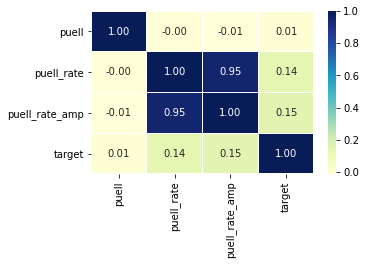

In [103]:
columns = [
 'puell',
 'puell_rate',
 'puell_rate_amp',
 'target']
d = df[columns].copy()
# d["test"] = list(map(lambda x: uf.log_abs(x), df.FlowTfrFromExCnt))
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(5, 3))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [104]:
dplot = df[:]

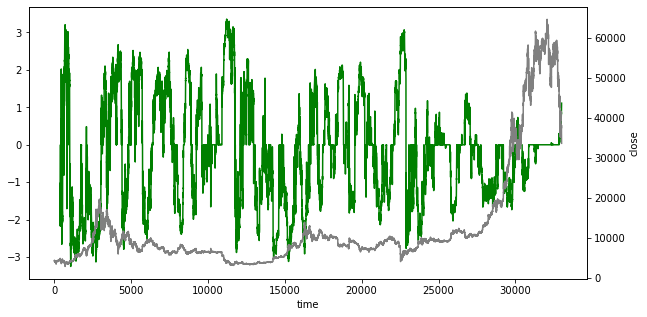

In [107]:
fig,ax = plt.subplots(figsize=(10, 5))
ax.plot(dplot.puell_rate_amp,
        color="green")
ax.set_xlabel("time")

ax2=ax.twinx()
ax2.plot(dplot.close,
     color="gray")

ax2.set_ylabel("close")
plt.show()


In [89]:
df.to_csv("../data/BTCUSDT-hour-target-features-all-puell.csv", index=False)